### 1.用于探索性数据分析，完成数据可视化等工作

In [14]:
import pandas as pd
import seaborn as sns
# Load the spreadsheet
file_path = './data.xlsx'
xls = pd.ExcelFile(file_path)

# List all sheet names to understand the structure of the file
sheet_names = xls.sheet_names
sheet_names


['Contents',
 'Table S9',
 'Table S10',
 'Table S11',
 'Table S12',
 'Table S13',
 'Table S14',
 'Table S15',
 'Table S16']

In [15]:
# 加载表格
file_path = './data.xlsx'  
xls = pd.ExcelFile(file_path)
table_s9 = pd.read_excel(xls, 'Table S9')

# 清理数据
table_s9.columns = table_s9.iloc[1]  # 使用第二行作为列名
table_s9 = table_s9.drop([0, 1]).reset_index(drop=True)  # 删除前两行并重置索引

In [16]:
table_s9.columns

Index(['Regions', 'Crop', 'Yield\n(kg/ha)', 'Blue Water\n(m3/ha)',
       'Green Water\n(m3/ha)', 'GHGs\n(kg eq CO2/ha)', 'Nitrogen\n(kg N/ha)',
       'Phosphorus\n(kg P2O5/ha)', 'Potash\n(kg K2O/ha)',
       'Pesticides\n(kg/ha)', 'Net Profit\n(US$/ha)', 'Harvested Area\n(ha)'],
      dtype='object', name=1)

In [17]:
# 分别提取七个地区的数据
regions = ['Northeast', 'North China', 'Yangtze', 'Southern China', 'Northwest', ' Southwest', 'Tibet']

# 创建每个地区的单独数据框
dfs = {region: table_s9[table_s9['Regions'] == region][table_s9.columns].reset_index(drop=True) for region in regions}

In [18]:
dfs['Northeast']

1,Regions,Crop,Yield\n(kg/ha),Blue Water\n(m3/ha),Green Water\n(m3/ha),GHGs\n(kg eq CO2/ha),Nitrogen\n(kg N/ha),Phosphorus\n(kg P2O5/ha),Potash\n(kg K2O/ha),Pesticides\n(kg/ha),Net Profit\n(US$/ha),Harvested Area\n(ha)
0,Northeast,Wheat,4008.862726,450.58814,1970.056752,3.15098,159.144914,100.732956,9.658233,4.042886,90.098207,344757.8
1,Northeast,Rice,6971.224029,2708.891439,3880.23585,5.04133,165.864822,78.96508,71.092529,18.424733,970.737479,3319167
2,Northeast,Maize,6467.48858,241.087475,3136.319869,1.179913,175.230883,93.540597,60.74403,8.245211,416.511346,9483499.2
3,Northeast,soybean,1707.137789,28.426541,3016.964595,1.840261,60.592214,62.622626,31.378579,8.491156,224.481575,4575899.3
4,Northeast,rapeseed,1786.043985,2.224894,465.355569,1.639008,190.629915,39.004368,0.918085,0.215088,-1092.575121,84248.5
5,Northeast,groundnut,2586.913008,437.943538,3113.729377,0.593604,126.34871,89.984782,59.459686,20.78099,741.540534,536157.2
6,Northeast,cotton,6342.937118,31.289653,3466.975997,0.288799,218.707268,127.415703,77.153247,43.233765,3507.687659,6014.1
7,Northeast,sugbeet,64913.650576,30.576147,3581.030078,1.476786,187.98675,112.08113,34.766015,6.315624,1216.527624,36792.1
8,Northeast,sugcane,0,0,0,0,0,0,0,0,0,0



### 比较全国各区域总作物产量

计算production，对应原文公式(1) 
$$
Production = \sum_{i} HA_{i} \times YLD_{i,z}
$$

In [19]:
total_yields = {}
for region, df in dfs.items():
    df['Production'] = df['Yield\n(kg/ha)'] * df['Harvested Area\n(ha)']
    total_yields[region] = df['Production'].sum()

In [20]:
total_yields

{'Northeast': 97630776973.28357,
 'North China': 153832545581.03867,
 'Yangtze': 130431703169.73157,
 'Southern China': 34098823511.154625,
 'Northwest': 71168596321.45511,
 ' Southwest': 168272062911.38132,
 'Tibet': 1112006489.60433}

In [21]:
# 数据
data = {
    'NE': 97630776973.28357,
    'NC': 153832545581.03867,
    'YZ': 130431703169.73157,
    'SC': 34098823511.154625,
    'NW': 71168596321.45511,
    'SW': 168272062911.38132,
    'TR': 1112006489.60433
}

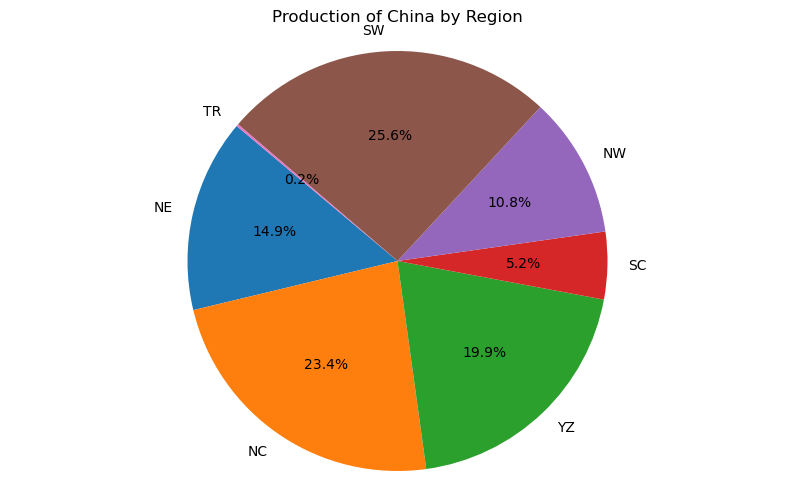

In [22]:
# 饼状图
import matplotlib.pyplot as plt
labels = list(data.keys())
sizes = list(data.values())
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Production of China by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

c:\Users\10345\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


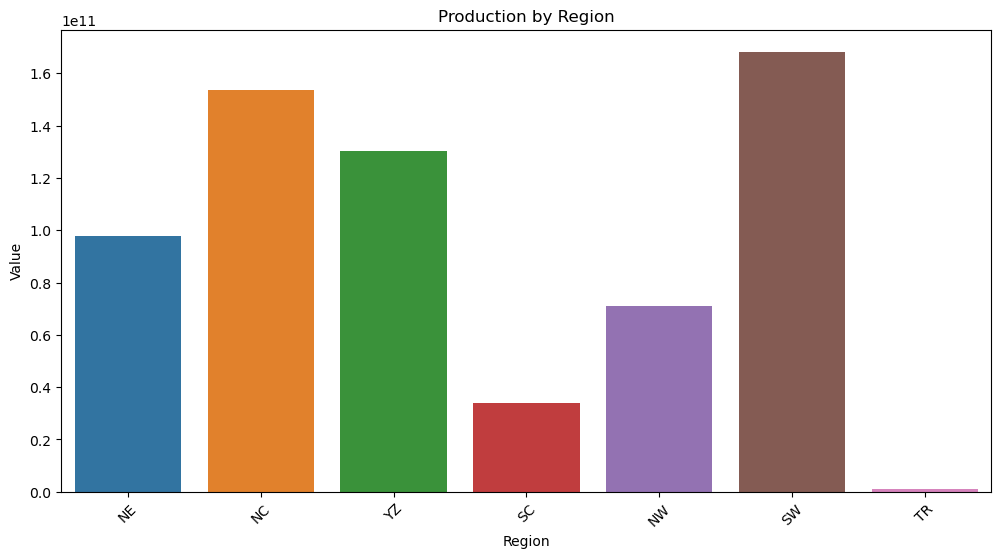

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x=labels, y=sizes)
plt.title('Production by Region')
plt.xlabel('Region')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

In [24]:
from pyecharts.charts import Map
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode



# 省份与缩写的映射关系
province_map = {
    'NE': ['黑龙江省', '吉林省', '辽宁省','内蒙古自治区'],
    'NC': ['北京市', '天津市', '河北省','河南省', '山东省'],
    'YZ': ['上海市', '江苏省', '浙江省', '安徽省',  '江西省','湖北省','湖南省'],
    'SC': ['广东省', '福建省', '海南省'],
    'NW': ['陕西省', '甘肃省', '山西省', '宁夏回族自治区', '新疆维吾尔自治区'],
    'SW': ['重庆市', '四川省', '贵州省', '云南省', '广西壮族自治区'],
    'TR': ['西藏自治区','青海省']
}

# 创建地图
map_chart = Map()
map_chart.add(
    series_name="Production",
    data_pair=[(k, v) for k, v in data.items()],
    maptype="china",
    is_map_symbol_show=True
)
map_chart.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
map_chart.set_global_opts(
    title_opts=opts.TitleOpts(title="中国各区域粮食产量"),
    visualmap_opts=opts.VisualMapOpts(
        max_=21e11,
        min_=0,
        is_piecewise=True,
        pieces=[
            {"min": 0e10, "max": 2e10},
            {"min": 2e10, "max": 5e10},
            {"min": 5e10, "max": 7e10},
            {"min": 7e10, "max": 9e10},
            {"min": 9e10, "max": 11e10},
            {"min": 11e10, "max": 13e10},
            {"min": 13e10, "max": 15e10},
            {"min": 15e10, "max": 17e10},
            {"min": 17e10, "max": 19e10},
            {"min": 19e10, "max": 21e10},
            {"min":21e10}
        ],
        pos_top="middle",
        pos_left="left"
    )
)

# 标注省份数据
for region, provinces in province_map.items():
    for province in provinces:
        map_chart.add(
            series_name="",
            data_pair=[(province, data[region])],
            maptype="china",
            is_map_symbol_show=False,
            label_opts=opts.LabelOpts(
                is_show=True,
                position="inside",
                formatter=JsCode("function (params) {return params.name;}"),
                font_size=8,
            ),
        )

# 渲染地图
map_chart.render('china_production.html')


'c:\\Users\\10345\\OneDrive\\myjupyter\\code\\china_production.html'

结果如下图所示：在2010年西南(SW),长江平原(YZ),华北平原地区(NC)贡献了我国粮食的主要产量

![image-20240527210335043](https://chenzhanghao.oss-cn-shenzhen.aliyuncs.com/image-20240527210335043.png)

### Water model：全国绿水，蓝水使用量分析

绿水指的是作物生长期消耗的有效降水量,蓝水是指在作物生长季节的自然有效降水不足以维持作物的正常生长时，需要通过灌溉补充的水量

#### 总绿水使用量公式
$$
\text{TGW}_{\text{irr/ra},i} = \sum_z \text{HA}_{\text{irr/ra},i,z} \times \text{GW}_{i,z}
$$



#### 总蓝水使用量公式
$$
\text{TBW}_{\text{irr},i} = \sum_z \text{HA}_{\text{irr},i,z} \times \text{BW}_{i,z}
$$

In [25]:
total_blue_water = {}
total_green_water = {}
for region, df in dfs.items():
    df['Total Blue Water (m3)'] = df['Blue Water\n(m3/ha)'] * df['Harvested Area\n(ha)']
    df['Total Green Water (m3)'] = df['Green Water\n(m3/ha)'] * df['Harvested Area\n(ha)']
    total_blue_water[region] = df['Total Blue Water (m3)'].sum()
    total_green_water[region] = df['Total Green Water (m3)'].sum()

In [26]:
total_green_water

{'Northeast': 58968214656.63645,
 'North China': 72612165964.61945,
 'Yangtze': 92178284056.02237,
 'Southern China': 20416615457.934563,
 'Northwest': 31543372705.269745,
 ' Southwest': 69150937545.74623,
 'Tibet': 942020761.88587}

In [27]:
total_blue_water

{'Northeast': 11799343882.15395,
 'North China': 39502472476.71481,
 'Yangtze': 21745947693.38227,
 'Southern China': 3288572302.26558,
 'Northwest': 35245929838.61415,
 ' Southwest': 6957393173.395659,
 'Tibet': 390958173.68723005}

In [28]:
province_greenwater_usage = {}

for region, provinces in province_map.items():
    region_name = ''
    if region == 'NE':
        region_name = 'Northeast'
    elif region == 'NC':
        region_name = 'North China'
    elif region == 'YZ':
        region_name = 'Yangtze'
    elif region == 'SC':
        region_name = 'Southern China'
    elif region == 'NW':
        region_name = 'Northwest'
    elif region == 'SW':
        region_name = ' Southwest'
    elif region == 'TR':
        region_name = 'Tibet'

    for province in provinces:
        province_greenwater_usage[province] = total_green_water[region_name]


In [29]:
# 绿水使用量地图
green_water_map = Map()
green_water_map.add("绿水使用量", [list(z) for z in province_greenwater_usage.items()], "china")
green_water_map.set_global_opts(
    title_opts=opts.TitleOpts(title="中国各区域绿水使用量"),
    visualmap_opts=opts.VisualMapOpts(max_=max(total_green_water.values()), min_=min(total_green_water.values()))
)
green_water_map.render('china_green_water_map.html')

'c:\\Users\\10345\\OneDrive\\myjupyter\\code\\china_green_water_map.html'

分析绿水用量可以发现，我国长江中下游平原地区降水量丰富，结合蓝水需求量来看供水仍有压力，仍需进一步安排合理使用水资源。我国南部（广东福建一带）降雨量丰富，绿水供应充足，但结合上面我国粮食产量，南部地区种植总量仅仅占全国总量的5.2%，存在供大于求的情况。建议可以在南部地区种植一些耗水量需求大的作物，合理作物分配，以提高绿水利用率。

![](https://chenzhanghao.oss-cn-shenzhen.aliyuncs.com/image-20240528163501520.png)

In [30]:
province_bluewater_usage = {}

for region, provinces in province_map.items():
    region_name = ''
    if region == 'NE':
        region_name = 'Northeast'
    elif region == 'NC':
        region_name = 'North China'
    elif region == 'YZ':
        region_name = 'Yangtze'
    elif region == 'SC':
        region_name = 'Southern China'
    elif region == 'NW':
        region_name = 'Northwest'
    elif region == 'SW':
        region_name = ' Southwest'
    elif region == 'TR':
        region_name = 'Tibet'

    for province in provinces:
        province_bluewater_usage[province] = total_blue_water[region_name]


In [31]:
# 蓝水使用量地图
blue_water_map = Map()
blue_water_map.add("蓝水使用量", [list(z) for z in province_bluewater_usage.items()], "china")
blue_water_map.set_global_opts(
    title_opts=opts.TitleOpts(title="中国各区域蓝水使用量"),
    visualmap_opts=opts.VisualMapOpts(max_=max(total_blue_water.values()), min_=min(total_blue_water.values()))
)
blue_water_map.render('china_blue_water_map.html')

'c:\\Users\\10345\\OneDrive\\myjupyter\\code\\china_blue_water_map.html'

可以发现西北地区蓝水使用量较高，该地区较为干旱，作物普遍需要人工补水
而华北平原作为我国粮产大省，同样面临严峻蓝水资源短缺的问题
![image-20240528162351878](https://chenzhanghao.oss-cn-shenzhen.aliyuncs.com/image-20240528162351878.png)

为了通过作物转换促进我国可持续发展，在进行最后的优化之前，我们可以先通过分析不同作物耗水量的相关关系，对如何进行作物转换有一个大概的概念

In [32]:
water_usage_by_crop = df.groupby('Crop').agg({
    'Blue Water\n(m3/ha)': 'mean',
    'Green Water\n(m3/ha)': 'mean'
}).reset_index()

In [33]:
water_usage_by_crop

1,Crop,Blue Water\n(m3/ha),Green Water\n(m3/ha)
0,Maize,167.187621,2728.247617
1,Rice,886.312603,3369.23381
2,Wheat,1847.136618,1159.384381
3,cotton,5332.965775,1970.20869
4,groundnut,0.0,2665.666985
5,rapeseed,785.515468,1200.842885
6,soybean,0.06592,2741.244873
7,sugbeet,249.656862,3517.390819
8,sugcane,0.0,4386.22103


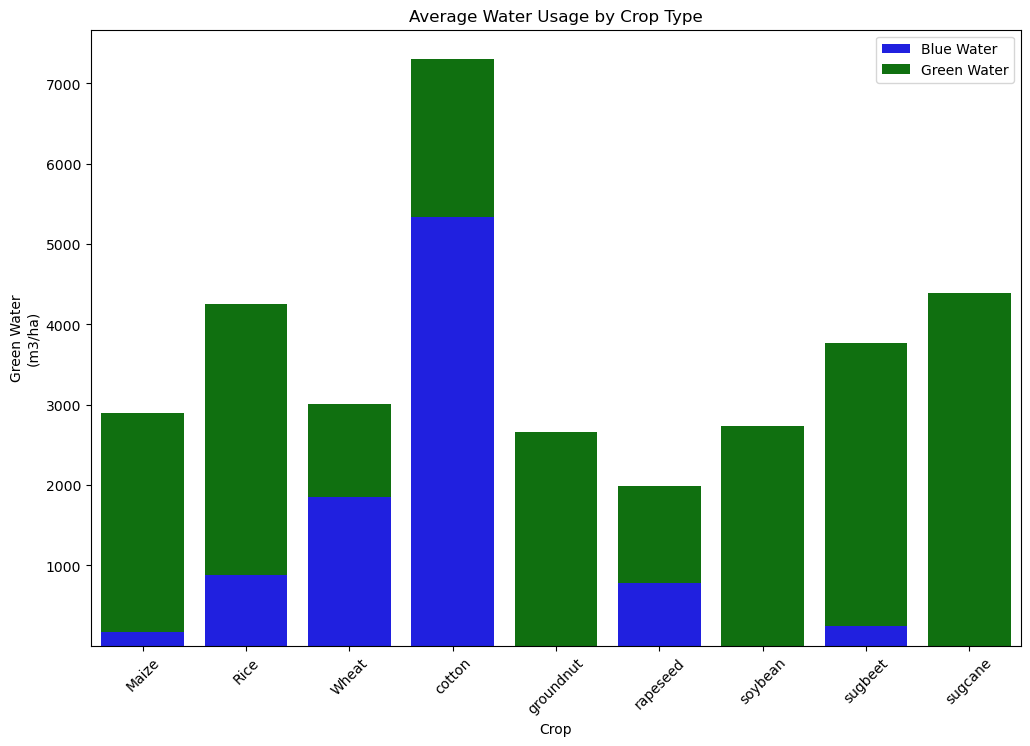

In [34]:
# 可视化每种作物的平均蓝水和绿水消耗
plt.figure(figsize=(12, 8))
sns.barplot(x='Crop', y='Blue Water\n(m3/ha)', data=water_usage_by_crop, color='blue', label='Blue Water')
sns.barplot(x='Crop', y='Green Water\n(m3/ha)', data=water_usage_by_crop, color='green', bottom=water_usage_by_crop['Blue Water\n(m3/ha)'], label='Green Water')
plt.title('Average Water Usage by Crop Type')
plt.xticks(rotation=45)
plt.legend()
plt.show()

高耗蓝水作物：棉花（cotton）消耗量最高，其次是小麦（wheat）。
高耗绿水作物：甘蔗（sugcane）和甜菜（sugbeet）消耗量最高。
我们建议绿水消耗高的作物集中种植在南部沿海地区，减少对蓝水的消耗
对棉花，小麦，大米等总耗水量较高的作物，建议合理供水结构，因地制宜，结合当地具体谷物结构进行优化


### Statistic model：氮磷钾农药+农民收入 五个指标

In [35]:
npk_usage_by_crop = df.groupby('Crop').agg({
    'Nitrogen\n(kg N/ha)': 'mean',
    'Phosphorus\n(kg P2O5/ha)': 'mean',
    'Potash\n(kg K2O/ha)': 'mean'
}).reset_index()

In [36]:
npk_usage_by_crop

1,Crop,Nitrogen\n(kg N/ha),Phosphorus\n(kg P2O5/ha),Potash\n(kg K2O/ha)
0,Maize,243.276702,72.945286,31.083328
1,Rice,180.131395,60.341833,44.161029
2,Wheat,184.198139,94.228489,37.906451
3,cotton,370.679133,210.279874,20.059414
4,groundnut,118.389448,90.446823,68.897315
5,rapeseed,122.992218,74.464338,11.469179
6,soybean,55.95,51.0,25.35
7,sugbeet,235.65,151.35,22.05
8,sugcane,466.65,175.95,181.8


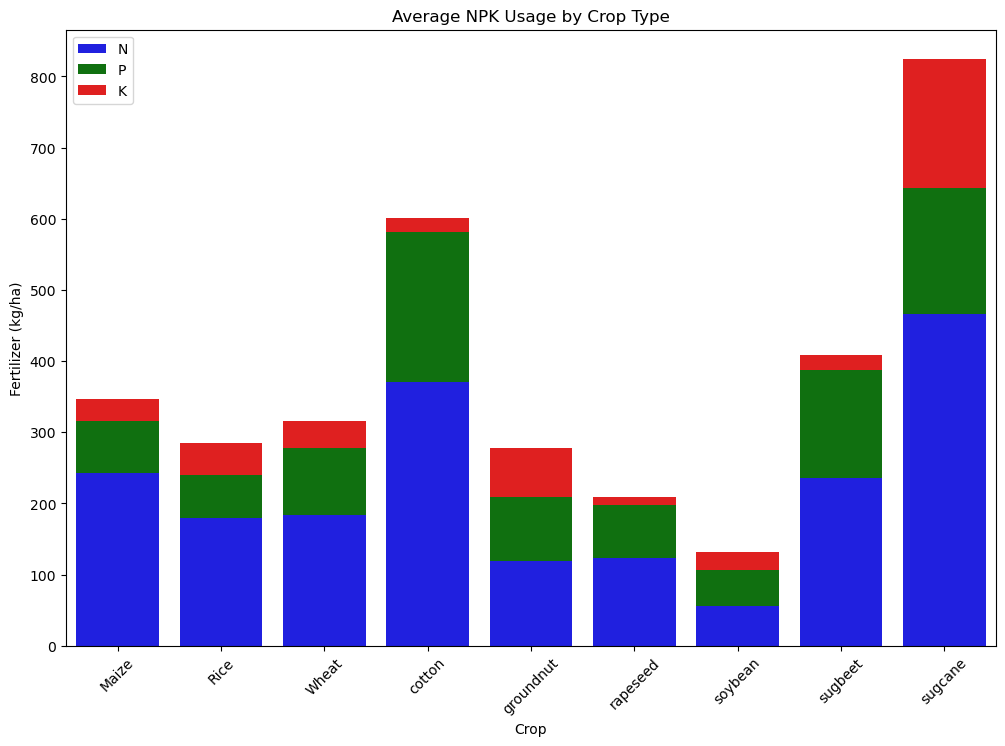

In [37]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Crop', y='Nitrogen\n(kg N/ha)', data=npk_usage_by_crop, color='blue', label='N')
sns.barplot(x='Crop', y='Phosphorus\n(kg P2O5/ha)', data=npk_usage_by_crop, color='green', label='P', bottom=npk_usage_by_crop['Nitrogen\n(kg N/ha)'])
sns.barplot(x='Crop', y='Potash\n(kg K2O/ha)', data=npk_usage_by_crop, color='red', label='K', bottom=npk_usage_by_crop['Nitrogen\n(kg N/ha)'] + npk_usage_by_crop['Phosphorus\n(kg P2O5/ha)'])
plt.title('Average NPK Usage by Crop Type')
plt.ylabel('Fertilizer (kg/ha)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

棉花和甘蔗的肥料需求最高

#### 农药使用量公式
$$
\text{TPT}_{\text{irr/ra},i} = \sum_z \text{HA}_{\text{irr/ra},i,z} \times \text{PT}_{i,z}
$$



#### 农民收入公式
$$
\text{TFI}_{\text{irr},i} = \sum_z \text{HA}_{\text{irr},i,z} \times \text{YLD}_{\text{irr},i,z} \times \text{NetProfit}_{i,z}
$$

In [38]:
pesticide_income_by_crop = df.groupby('Crop').agg({
    'Pesticides\n(kg/ha)': 'mean',
    'Net Profit\n(US$/ha)': 'mean'
}).reset_index()

In [39]:
pesticide_income_by_crop

1,Crop,Pesticides\n(kg/ha),Net Profit\n(US$/ha)
0,Maize,8.223173,160.023597
1,Rice,21.30536,211.836873
2,Wheat,8.964628,28.223521
3,cotton,14.959107,1754.111241
4,groundnut,15.850759,604.975823
5,rapeseed,7.033597,83.456022
6,soybean,8.518635,229.713243
7,sugbeet,7.000608,822.028666
8,sugcane,25.75487,466.962308


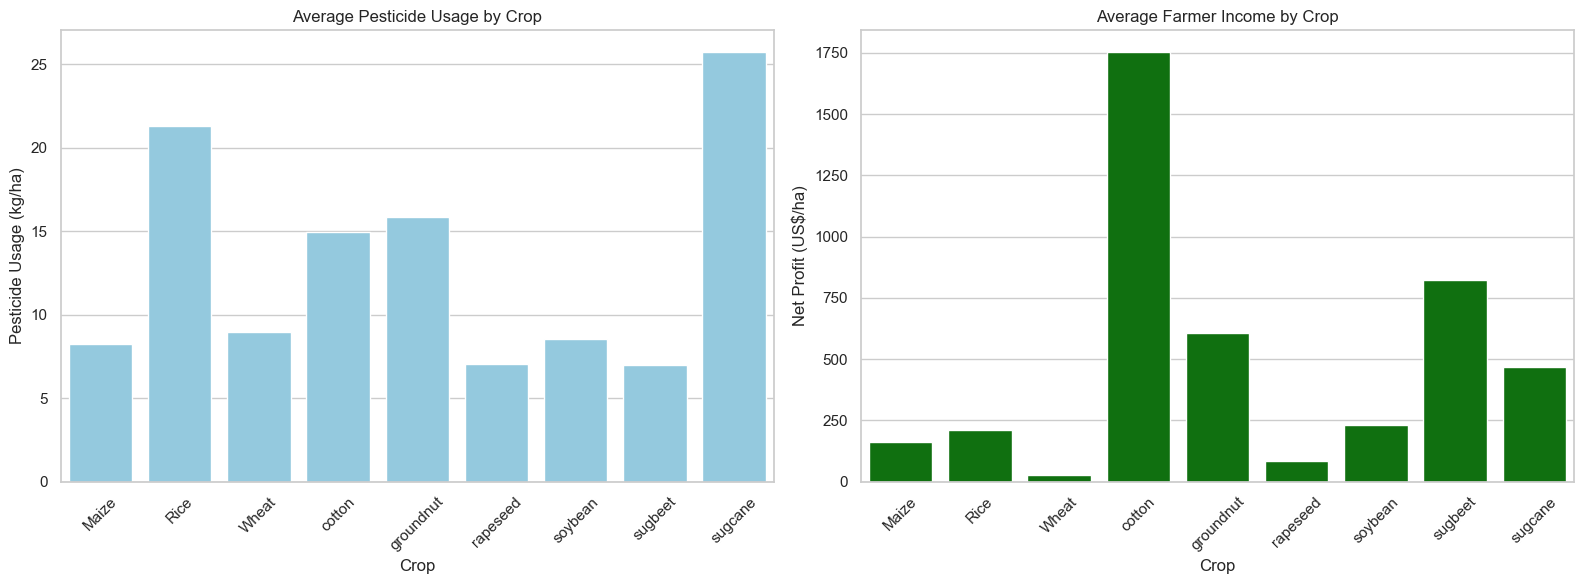

In [40]:
sns.set(style="whitegrid")

data = pesticide_income_by_crop

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# 第一个柱状图：农药用量
sns.barplot(x='Crop', y='Pesticides\n(kg/ha)', data=data, ax=ax[0], color='skyblue')
ax[0].set_title('Average Pesticide Usage by Crop')
ax[0].set_xlabel('Crop')
ax[0].set_ylabel('Pesticide Usage (kg/ha)')
ax[0].tick_params(axis='x', rotation=45)

# 第二个柱状图：农民收入
sns.barplot(x='Crop', y='Net Profit\n(US$/ha)', data=data, ax=ax[1], color='green')
ax[1].set_title('Average Farmer Income by Crop')
ax[1].set_xlabel('Crop')
ax[1].set_ylabel('Net Profit (US$/ha)')
ax[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

大米和甘蔗需要的平均农药使用量最多，棉花，甜菜，花生的平均收益量最大

In [41]:
# 计算每个地区的总农药用量和总净收入
table_s9['Total Pesticides (kg)'] = table_s9['Pesticides\n(kg/ha)'] * table_s9['Harvested Area\n(ha)']
table_s9['Total Net Profit (US$)'] = table_s9['Net Profit\n(US$/ha)'] * table_s9['Harvested Area\n(ha)']

In [42]:
region_summary = table_s9.groupby('Regions').agg({
    'Total Pesticides (kg)': 'sum',
    'Total Net Profit (US$)': 'sum'
}).reset_index()

In [43]:
region_summary

1,Regions,Total Pesticides (kg),Total Net Profit (US$)
0,Southwest,265462443.027777,6772941982.060493
1,North China,403715573.222467,18806987282.551975
2,Northeast,191249087.034809,8601680637.090492
3,Northwest,134821401.881126,7318680922.831729
4,Southern China,128155254.695802,1714535347.772261
5,Tibet,5335179.671999,66751334.602762
6,Yangtze,629461017.773724,14326150559.87088


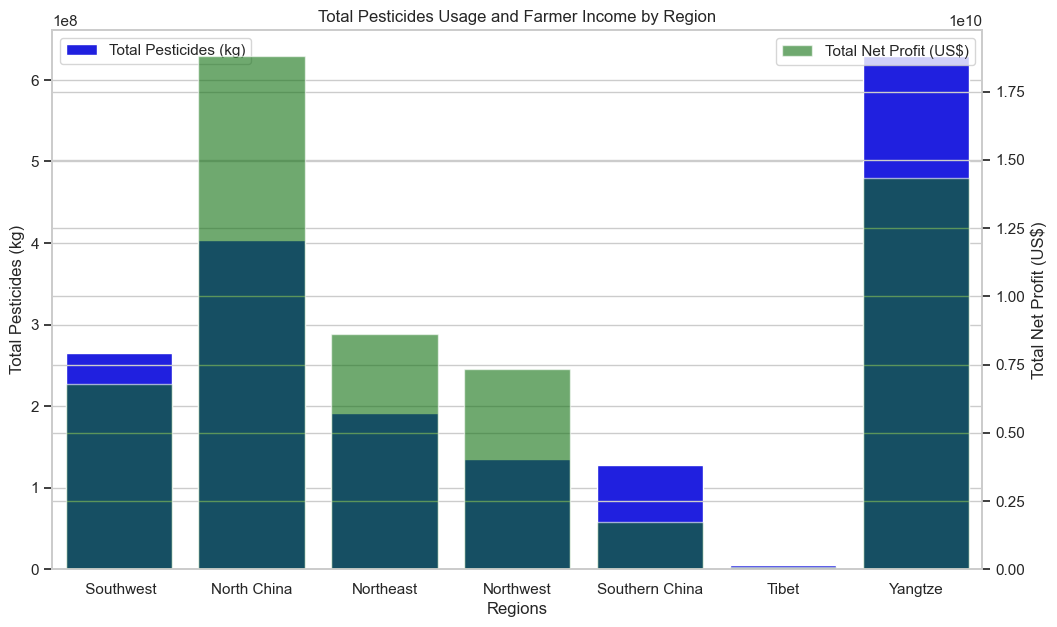

In [44]:
sns.set(style="whitegrid")

# 创建柱状图
fig, ax1 = plt.subplots(figsize=(12, 7))

# 柱状图1: 农药用量
sns.barplot(x='Regions', y='Total Pesticides (kg)', data=region_summary, ax=ax1, color='blue', label='Total Pesticides (kg)')
ax1.set_ylabel('Total Pesticides (kg)')
ax1.set_title('Total Pesticides Usage and Farmer Income by Region')
ax1.legend(loc='upper left')

# 创建双轴
ax2 = ax1.twinx()
sns.barplot(x='Regions', y='Total Net Profit (US$)', data=region_summary, ax=ax2, color='green', alpha=0.6, label='Total Net Profit (US$)')
ax2.set_ylabel('Total Net Profit (US$)')
ax2.legend(loc='upper right')

plt.show()

华北平原和长江中下游平原地区农药使用量和农民收入最高。
西南华南和长江平原地区农药用量较高，但农民收入反而不高，存在作物转换的空间

#### GHG model

$$
\text{TGHG}_{\text{irr/ra},i} = \sum_z \text{HA}_{\text{irr/ra},i,z} \times \text{GHG}_{i,z}
$$


In [45]:
table_s9['Total GHGs (kg eq CO2)'] = table_s9['GHGs\n(kg eq CO2/ha)'] * table_s9['Harvested Area\n(ha)']

# 汇总数据
ghg_summary = table_s9.groupby('Regions').agg({
    'Total GHGs (kg eq CO2)': 'sum'
}).reset_index()

In [46]:
ghg_summary

1,Regions,Total GHGs (kg eq CO2)
0,Southwest,65510286.28995
1,North China,41683124.89857
2,Northeast,37942310.521
3,Northwest,16032302.973
4,Southern China,27019728.51713
5,Tibet,829558.85051
6,Yangtze,125445791.01435


In [53]:
ghg_summary['Total GHGs (kg eq CO2)']

0     65510286.28995
1     41683124.89857
2       37942310.521
3       16032302.973
4     27019728.51713
5       829558.85051
6    125445791.01435
Name: Total GHGs (kg eq CO2), dtype: object

In [48]:
ghg_dict = dict(zip(ghg_summary['Regions'], ghg_summary['Total GHGs (kg eq CO2)']))

In [49]:
ghg_dict

{' Southwest': 65510286.28995001,
 'North China': 41683124.89856999,
 'Northeast': 37942310.521000005,
 'Northwest': 16032302.973000001,
 'Southern China': 27019728.517129995,
 'Tibet': 829558.85051,
 'Yangtze': 125445791.01434998}

In [50]:
province_ghg_usage = {}

for region, provinces in province_map.items():
    region_name = ''
    if region == 'NE':
        region_name = 'Northeast'
    elif region == 'NC':
        region_name = 'North China'
    elif region == 'YZ':
        region_name = 'Yangtze'
    elif region == 'SC':
        region_name = 'Southern China'
    elif region == 'NW':
        region_name = 'Northwest'
    elif region == 'SW':
        region_name = ' Southwest'
    elif region == 'TR':
        region_name = 'Tibet'

    for province in provinces:
        province_ghg_usage[province] = ghg_dict[region_name]


In [51]:
# 蓝水使用量地图
ghg_map = Map()
ghg_map.add("温室气体排放量", [list(z) for z in province_ghg_usage.items()], "china")
ghg_map.set_global_opts(
    title_opts=opts.TitleOpts(title="中国各区域温室气体排放量"),
    visualmap_opts=opts.VisualMapOpts(max_=max(ghg_dict.values()), min_=min(ghg_dict.values()))
)
ghg_map.render('china_ghg_map.html')

'c:\\Users\\10345\\OneDrive\\myjupyter\\code\\china_ghg_map.html'

![image-20240529154334666](https://chenzhanghao.oss-cn-shenzhen.aliyuncs.com/image-20240529154334666.png)
可以发现，长江中下游平原温室气体排放量最高